In [1]:
!pip install spacy
!pip install wordcloud
!pip install NLTK
!python -m spacy download en
!pip install textblob

     ---------------------------------------- 12.8/12.8 MB 5.3 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk import tokenize
from nltk.stem import PorterStemmer
from nltk import TweetTokenizer

import spacy
import re
import string
from wordcloud import WordCloud
from textblob import TextBlob
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from wordcloud import STOPWORDS


In [4]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lalkr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lalkr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lalkr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lalkr\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\lalkr\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lalkr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is alr

True

In [11]:
data = pd.read_csv("Elon_musk.csv",encoding='latin1')
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [12]:
data.drop(['Unnamed: 0'],axis = 1,inplace=True)
data.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [14]:
data.rename({'Text':'tweets'},axis = 1,inplace = True)
data.head()

,tweets
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [15]:
data.isna().sum()

tweets    0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


# Data Cleaning

Text Preprocessing

In [17]:
data = [tweets.strip() for tweets in data.tweets]
data = [tweets for tweets in data if tweets]
data[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [19]:
#joining the list into one string or text
text = ' '.join(data)
text[0:100]

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you trie'

In [20]:
#remove twitter user handel names from a given twitter text
tknzr = TweetTokenizer(strip_handles=True)
tweets_token = tknzr.tokenize(text)
tweets_token[0:10]

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with']

In [21]:
#again joining the list
tweets_token_text = ' '.join(tweets_token)
tweets_token_text[0:100]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview'

In [22]:
#remove all puctuation marks
no_punc_text = tweets_token_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[0:100]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  D'

In [23]:
#remove url or https within text
no_url_text = re.sub(r'http\s+','',no_punc_text)
no_url_text[0:100]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  D'

In [24]:
#tokenization
text_tokens = word_tokenize(no_url_text)
text_tokens[0:10]

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with']

In [25]:
#token count
len(text_tokens)

18501

In [26]:
#remove stopwords from corpus
my_stop_words = stopwords.words('english')
sw_list = ['\x92','rt','ye','yeah','haha','yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
no_stop_tokens[0:10]

['alien',
 'Ray',
 'tracing',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'Have',
 'tried',
 'Great',
 'interview']

In [27]:
#normalize the data
lower_words = [Text.lower() for Text in no_stop_tokens]
lower_words[0:10]

['alien',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tried',
 'great',
 'interview']

In [28]:
#stemming (just for understanding purpose and comparison with lemitization)
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
stemmed_tokens[0:10]

['alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tri',
 'great',
 'interview']

In [29]:
#lemmatization
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(lower_words))
doc[0:10]

alien ray tracing cyberpunk hdr nextlevel have tried great interview

In [30]:
#breaking into lemmas
lemmas = [token.lemma_ for token in doc]
lemmas[0:10]

['alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'try',
 'great',
 'interview']

In [32]:
# joining again all tweets
clean_tweets = ' '.join(lemmas)
clean_tweets[0:500]

'alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox httpstco9wfkmyu2oj frodo underdoge all thought would fail himself httpstcozgxjfdzzrm haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse httpstco3rwe9uhst it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high t'

# Feature Extraction

Count Vectorizer

In [33]:
cv = CountVectorizer()
x = cv.fit_transform(lemmas)

In [34]:
print(cv.vocabulary_)

{'alien': 194, 'ray': 2992, 'trace': 3656, 'cyberpunk': 766, 'hdr': 1355, 'nextlevel': 2606, 'have': 1350, 'try': 3686, 'great': 1302, 'interview': 2203, 'doge': 889, 'underestimate': 3820, 'congratulation': 674, 'tesla': 3561, 'china': 583, 'amazing': 217, 'execution': 1056, 'last': 2287, 'year': 4037, 'now': 2633, 'next': 2605, 'even': 1030, 'happy': 1337, 'new': 2603, 'ox': 2734, 'httpstco9wfkmyu2oj': 1536, 'frodo': 1205, 'underdoge': 3819, 'all': 197, 'thought': 3598, 'would': 4023, 'fail': 1090, 'himself': 1399, 'httpstcozgxjfdzzrm': 2069, 'haha': 1325, 'thank': 3572, 'indeed': 2144, 'tweet': 3702, 'definitely': 803, 'represent': 3058, 'realworld': 3007, 'time': 3614, 'allocation': 199, 'the': 3577, 'entertaining': 1000, 'outcome': 2713, 'likely': 2342, 'just': 2245, 'send': 3201, 'agree': 179, 'clubhouse': 612, 'httpstco3rwe9uhst': 1474, 'it': 2222, 'get': 1263, 'real': 3002, 'buy': 501, 'dogecoin': 891, 'lil': 2343, 'toddler': 3626, 'hodler': 1405, 'he': 1356, 'issue': 2221, 'se

In [35]:
print(cv.get_feature_names()[100:200])

['74', '78', '7th', '90', '9007', '922', '948', '95', '99', 'aber', 'able', 'abo', 'aboard', 'abort', 'about', 'above', 'absence', 'absolute', 'absolutely', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleration', 'accelerator', 'accept', 'acceptable', 'access', 'accessible', 'accident', 'accidental', 'accommodate', 'account', 'accura', 'accuracy', 'accurate', 'ace', 'achieve', 'achievement', 'achy', 'acquisition', 'across', 'action', 'active', 'activity', 'actual', 'actuall', 'actually', 'actuary', 'adagio', 'add', 'additive', 'address', 'administer', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertise', 'advice', 'advise', 'aero', 'afb', 'affair', 'affect', 'affordable', 'africa', 'after', 'afternoon', 'age', 'ago', 'agony', 'agree', 'ah', 'ahead', 'ahem', 'ai', 'aim', 'air', 'aircraft', 'airplane', 'ak', 'aka', 'alert', 'alexander', 'algo', 'algorithm', 'alien', 'aliens', 'align', 'all', 'allocati',

C:\Users\lalkr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [36]:
print(x.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [37]:
print(x.toarray().shape)

(12231, 4057)


Count Vectorizer with Ngrams

In [38]:
#fitting unigram,bigram and trigram
cv_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram = cv_ngram_range.fit_transform(lemmas)

In [39]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram)

['actually', 'ai', 'also', 'back', 'big', 'booster', 'car', 'come', 'cool', 'could', 'crew', 'day', 'design', 'do', 'dragon', 'earth', 'engine', 'even', 'ever', 'exactly', 'falcon', 'first', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'if', 'it', 'just', 'land', 'launch', 'life', 'like', 'look', 'lot', 'make', 'many', 'mar', 'maybe', 'mission', 'model', 'much', 'need', 'new', 'next', 'no', 'not', 'ok', 'one', 'part', 'people', 'point', 'pretty', 'probably', 'production', 'right', 'rocket', 'rt', 'say', 'seem', 'soon', 'space', 'spacex', 'starlink', 'starship', 'still', 'super', 'sure', 'take', 'tesla', 'test', 'thank', 'that', 'the', 'there', 'they', 'think', 'this', 'time', 'true', 'try', 'ufe0f', 'use', 'way', 'we', 'week', 'well', 'will', 'work', 'would', 'yeah', 'year', 'yes', 'you']
  (7, 86)	1
  (8, 28)	1
  (13, 75)	1
  (18, 97)	1
  (20, 50)	1
  (21, 17)	1
  (23, 49)	1
  (24, 97)	1
  (31, 95)	1
  (35, 29)	1
  (36, 77)	1
  (42, 84)	1
  (44, 79)

C:\Users\lalkr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


TF-IDF Vectorizer

In [42]:
#fitting our term frequency-inverse document frequency vectorizer
tfidfv_ngram_max_feat = TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidfv_matrix_ngram=tfidfv_ngram_max_feat.fit_transform(lemmas)

In [43]:
print(tfidfv_ngram_max_feat.get_feature_names())
print(tfidfv_matrix_ngram.toarray())

['10', '100', '13', '20', '2020', '30', '300', '40', '4d', '60', 'able', 'absolutely', 'access', 'accurate', 'actually', 'add', 'ago', 'agree', 'ai', 'aim', 'air', 'all', 'almost', 'already', 'also', 'although', 'always', 'amazing', 'and', 'another', 'appear', 'apply', 'appreciate', 'around', 'article', 'as', 'astronaut', 'at', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become', 'berlin', 'beta', 'big', 'bit', 'boca', 'body', 'booster', 'brain', 'bring', 'bs', 'build', 'burn', 'but', 'buy', 'cake', 'call', 'camera', 'can', 'car', 'cargo', 'catch', 'cell', 'ch4', 'chance', 'change', 'china', 'civilization', 'close', 'cold', 'color', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'cov', 'crazy', 'create', 'crew', 'critical', 'curevac', 'cyberpunk', 'cybertruck', 'datum', 'day', 'deep', 'definitely', 'delivery', 'design', 'detail', 'difference', 'different', 'do', 'dock', 'doge', 'dojo', 'd

C:\Users\lalkr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Generating Wordcloud

In [44]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis("off");

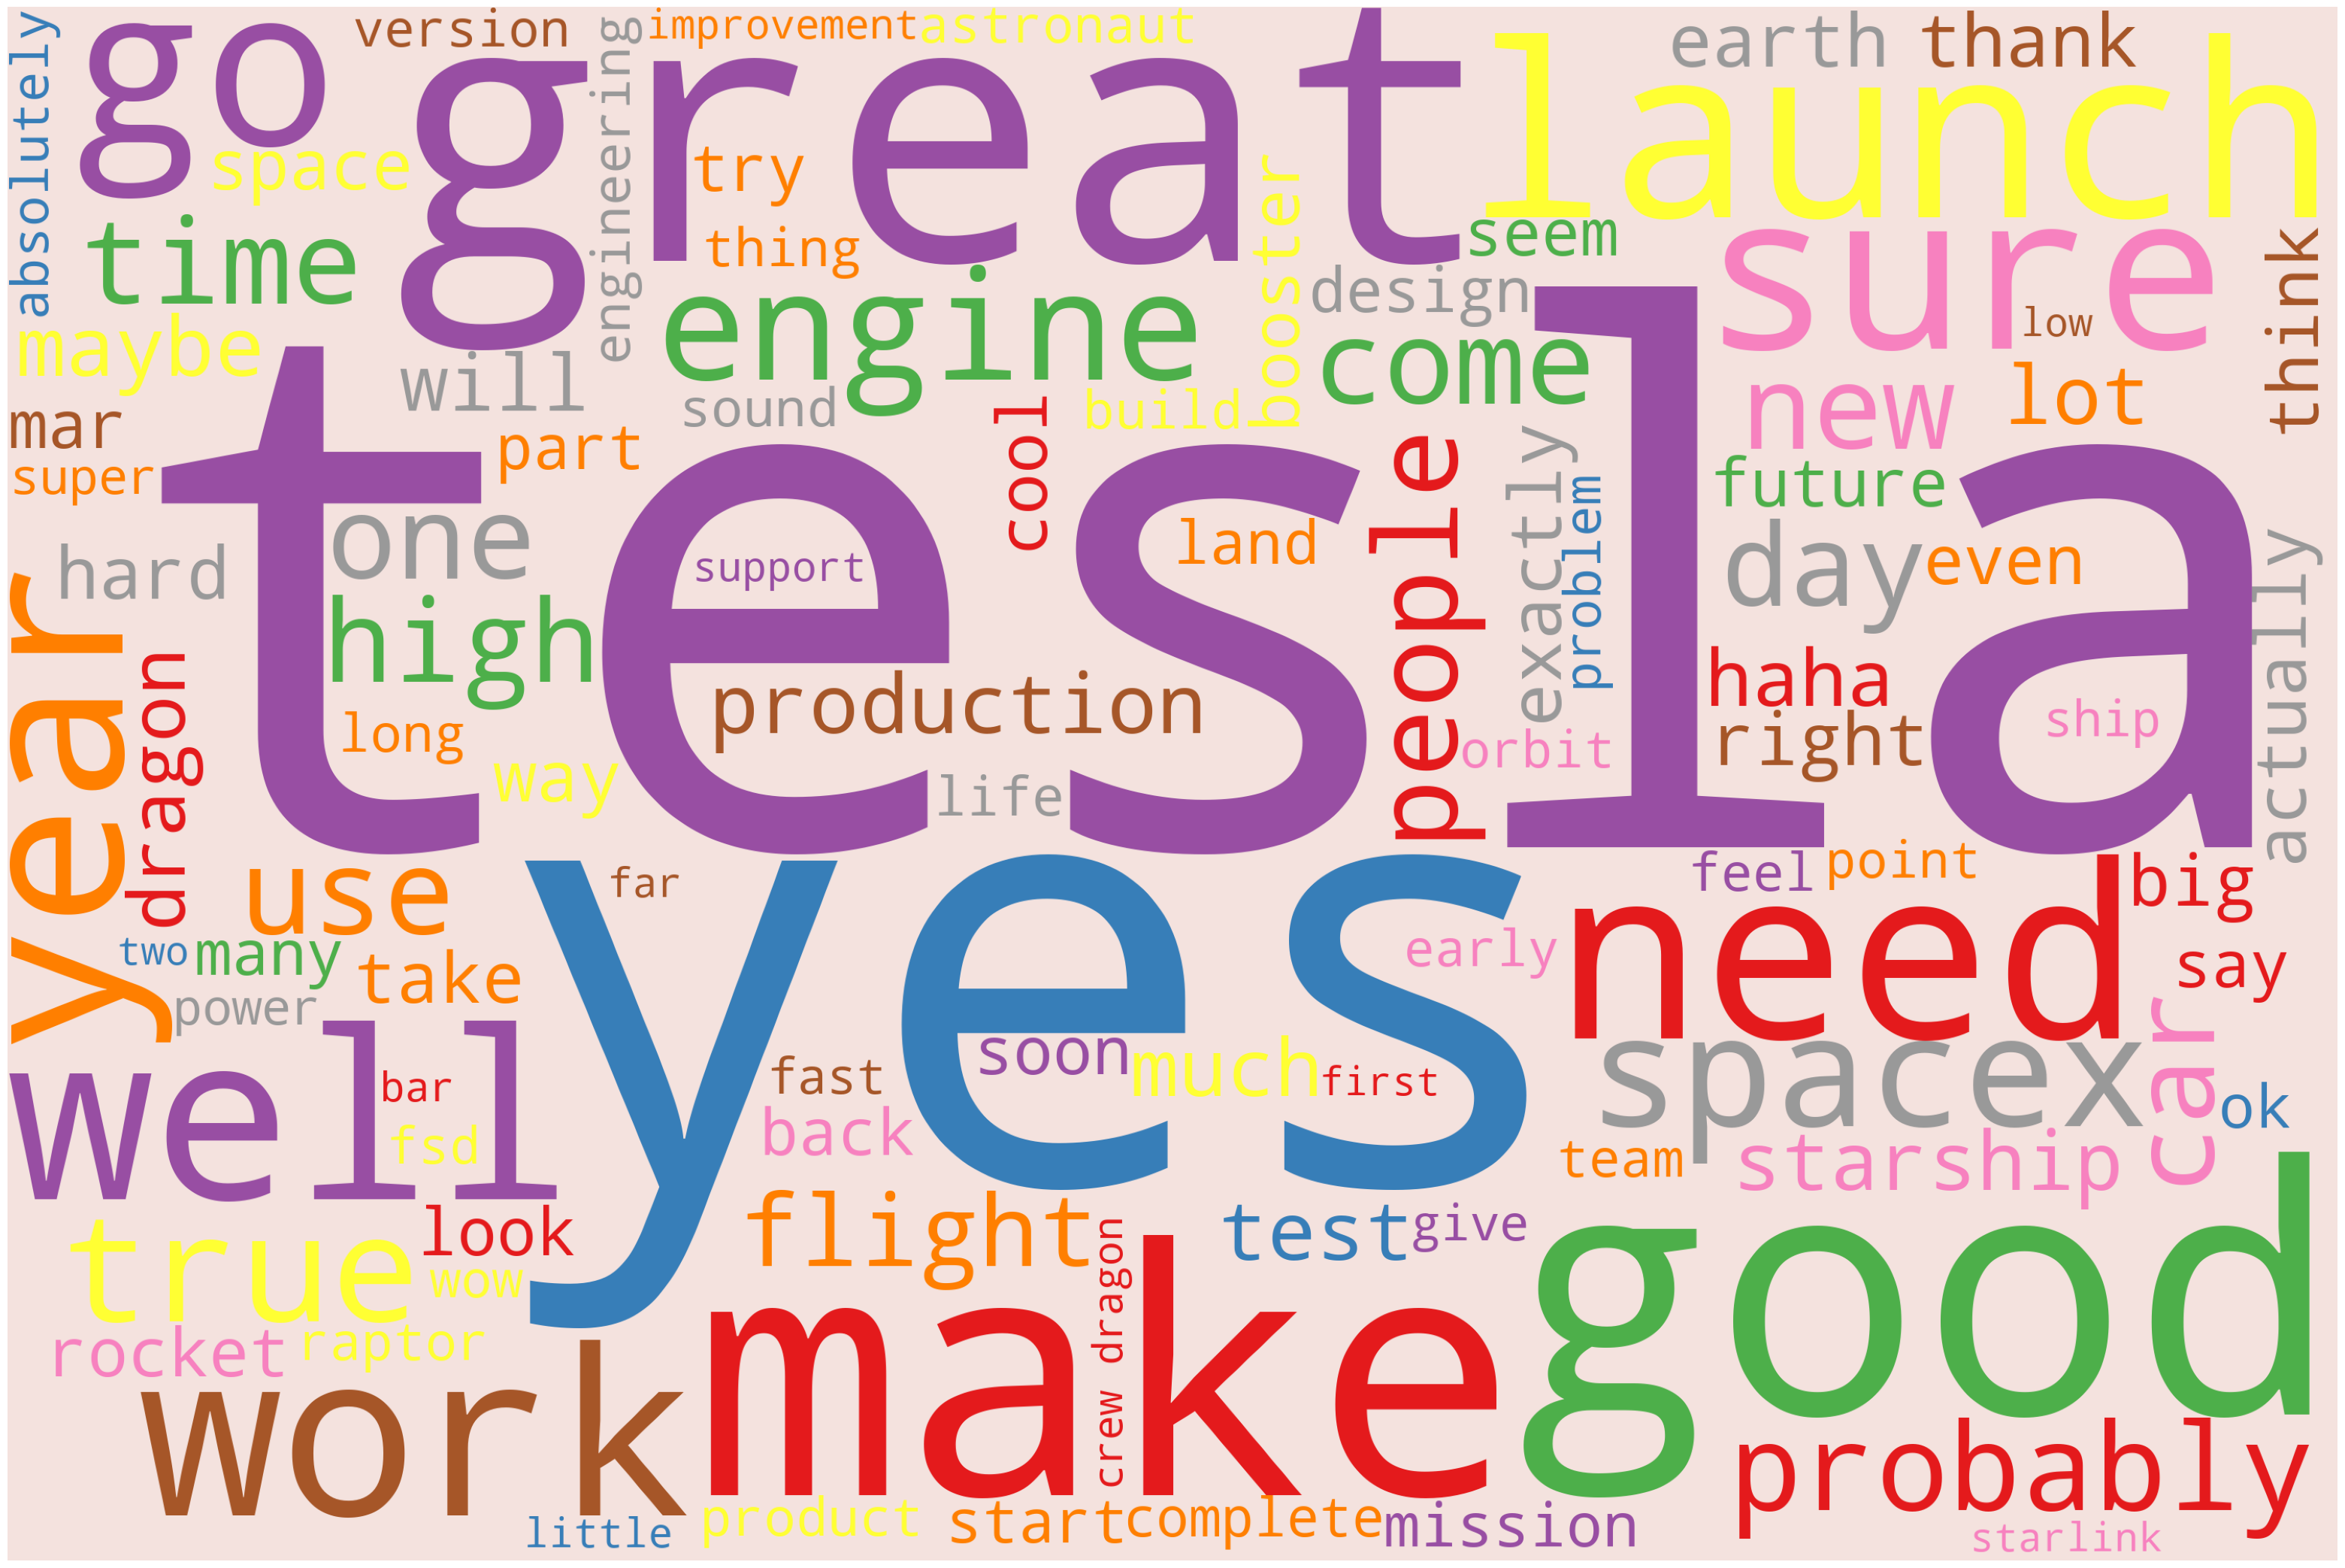

In [45]:
stopwords = STOPWORDS
stopwords.add('pron')
stopwords.add('rt')
stopwords.add('yeah')

wordcloud = WordCloud(width= 3000, height= 2000,background_color='#F4E2DE',max_words=100,
                     colormap='Set1',stopwords=STOPWORDS,contour_color='black',contour_width=2).generate(clean_tweets)
plot_cloud(wordcloud)

# Named Entity Recognition(NER)

In [46]:
nlp = spacy.load('en_core_web_sm')
one_block = clean_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style = 'ent',jupyter=True)

In [47]:
#printing position of words
for token in doc_block[0:20]:
    print(token,token.pos_)

alien PROPN
ray PROPN
trace NOUN
cyberpunk NOUN
hdr NOUN
nextlevel NOUN
have AUX
try VERB
great ADJ
interview NOUN
doge ADJ
underestimate ADJ
congratulation NOUN
tesla NOUN
china PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV


In [49]:
#filtering only nouns , verbs and Adjectives only
nouns_verbs_adj = [token.text for token in doc_block if token.pos_ in('NOUN','VERB','ADJECTIVE')]
print(nouns_verbs_adj[100:200])

['unit', 'time', 't', 'launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improve', 'ship', 'booster', 'mass', 'back', 'work', 'tonight', 'ðogecoin', 'video', 'httpstcoueeocofctb', 'people', 'speak', 'cute', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'u0001f3b6', 'let', 'doge', 'rainforest', 'come', 'fun', 'crypto', 'simplicity', 'genius', 'decade', 'work', 'look', 'note', 'email', 'text', 'lesson', 'learn', 'earth', 'time', 'tell', 'story', 'tesla', 'read', 'kingdom', 'hear', 'name', 'year', 'dogecake', 'thing', 'restaurant', 'hang', 'currency', 'earth', 'scratch', 'destiny', 'franz', 'say', 'ship', 'landing', 'burn', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'httpstcovso9h4ioe', 'seem', 'raptor', 'launch', 'mission', 'collect', 'datum', 'galaxy', 'explore', 'launch', 'starlink', 'satellite', 'orbit', 'mission', 'pad', '39a', 'deck', 'default', 'engine', 'lever', 'arm', 'shut', 'engine', 'min']


In [50]:
#counting nouns,verbs and adjectives

cv = CountVectorizer()
x2 = cv.fit_transform(nouns_verbs_adj)
sum_words = x2.sum(axis = 0)

words_freq = [(word,sum_words[0,idx])for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq,key = lambda x: x[1],reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:11]

,word,count
0,tesla,74
1,make,64
2,launch,62
3,year,49
4,work,47
5,need,47
6,go,43
7,come,41
8,day,38
9,get,37


<AxesSubplot:title={'center':'top 10 verbs,adjectives and nouns'}, xlabel='word'>

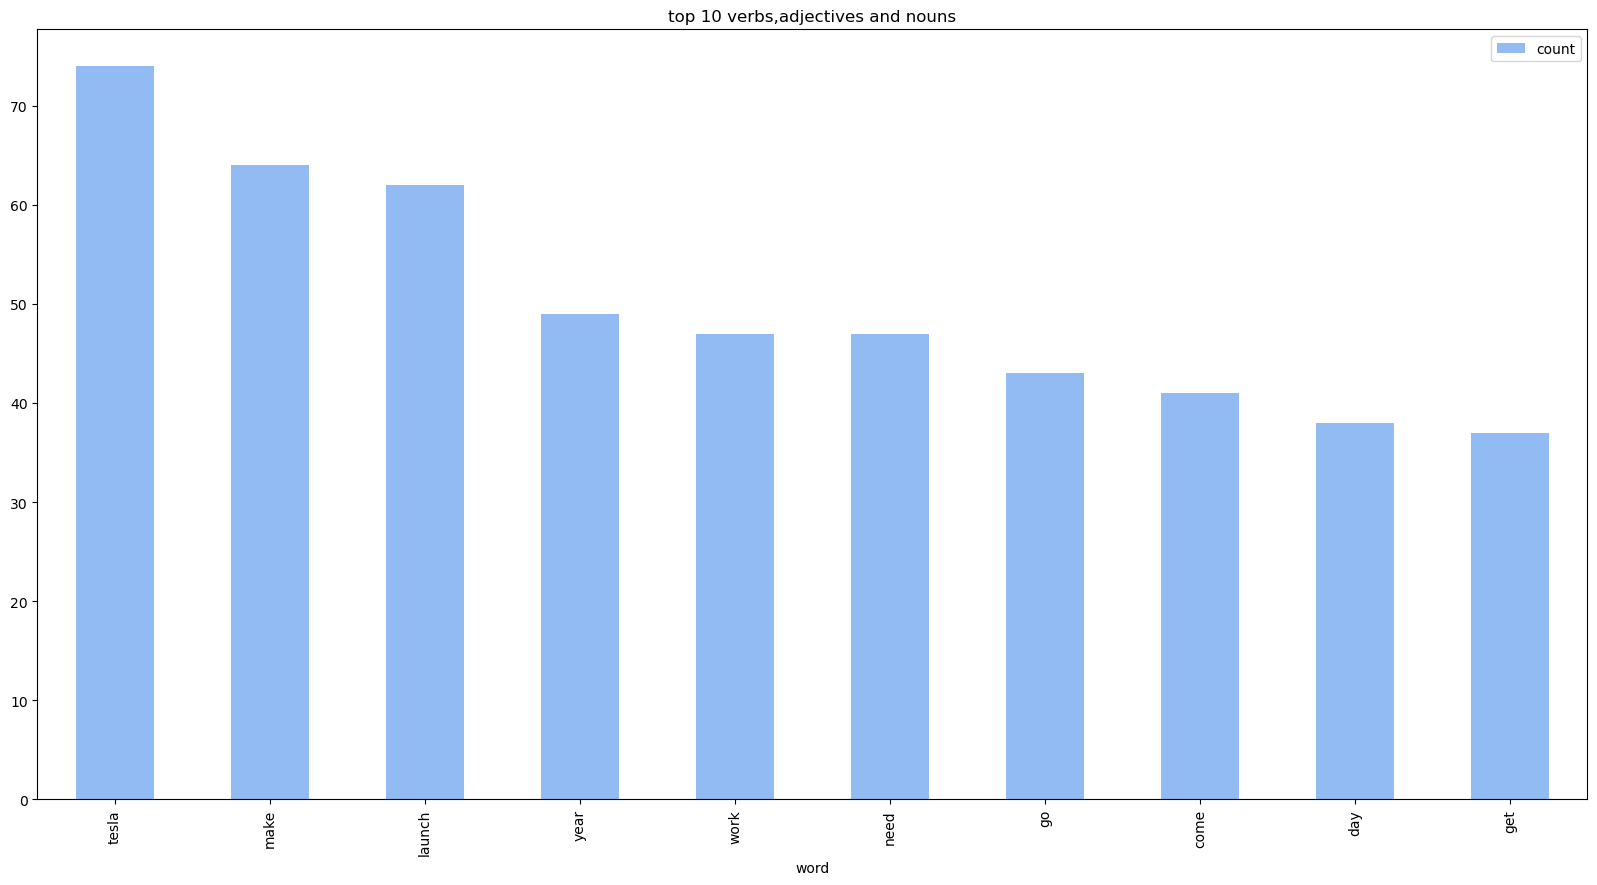

In [52]:
#visualizing our results on barplot
wd_df[0:10].plot.bar(x = 'word',figsize = (20,10),title = 'top 10 verbs,adjectives and nouns',color = '#91BBF2')

# Emotion Mining - sentimental Analysis

In [54]:
sentences = tokenize.sent_tokenize(' '.join(data))
sentences[0:10]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [55]:
sent_data = pd.DataFrame(sentences,columns=['sentence'])
sent_data

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...
